
# 📊 Customer Churn Prediction

This notebook walks through the complete workflow of predicting **customer churn** using machine learning.  
The goal is to identify customers likely to leave a service, so proactive retention strategies can be applied.



## 📂 Dataset Overview

The dataset `customer_churn_data.csv` contains customer information such as demographics, service usage, and contract details.  
The target variable is **`Churn`** (1 = churned, 0 = retained).


In [40]:
# Core Libraries
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation and analysis

# Visualization Libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced visualization
import missingno as msno  # Visualizing missing data patterns

# Scikit-learn: Model Building & Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Data splitting & hyperparameter tuning
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scaling & encoding
from sklearn.compose import ColumnTransformer  # Apply transformers to columns
from sklearn.pipeline import Pipeline  # Build ML pipelines

# Scikit-learn: Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Scikit-learn: Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# XGBoost: Extreme Gradient Boosting Model
from xgboost import XGBClassifier

# Model Persistence
import joblib  # For saving/loading trained models

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [41]:
# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

# Display the first few rows of the dataset
df.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [42]:
df.sample(50)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
970,971,46,Female,12,88.34,Month-to-Month,NaN,1060.08,No,Yes
944,945,63,Female,10,90.81,Two-Year,NaN,908.10,No,Yes
532,533,44,Female,11,105.68,Month-to-Month,Fiber Optic,1162.48,Yes,Yes
939,940,39,Female,5,58.42,Month-to-Month,NaN,292.10,No,Yes
319,320,43,Female,2,37.83,Month-to-Month,NaN,75.66,No,Yes
29,30,42,Male,62,97.66,Two-Year,Fiber Optic,6054.92,Yes,No
904,905,46,Female,16,106.50,Month-to-Month,NaN,1704.00,No,Yes
171,172,36,Male,0,90.10,Month-to-Month,NaN,0.00,No,Yes
115,116,48,Male,3,41.71,Month-to-Month,DSL,125.13,Yes,Yes
903,904,57,Male,9,85.54,Month-to-Month,DSL,769.86,No,Yes


In [43]:
# Filter for rows where Churn = No

df[df["Churn"] == "No"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
11,12,40,Female,19,36.18,One-Year,Fiber Optic,687.42,Yes,No
15,16,39,Female,41,89.11,Two-Year,Fiber Optic,3653.51,Yes,No
18,19,35,Male,98,49.59,Two-Year,Fiber Optic,4859.82,Yes,No
24,25,39,Male,47,79.36,One-Year,DSL,3729.92,Yes,No
...,...,...,...,...,...,...,...,...,...,...
946,947,29,Female,15,98.06,One-Year,Fiber Optic,1470.90,Yes,No
950,951,42,Male,13,52.58,One-Year,DSL,683.54,Yes,No
956,957,48,Female,18,60.54,One-Year,Fiber Optic,1089.72,Yes,No
963,964,52,Male,45,66.06,Two-Year,DSL,2972.70,Yes,No


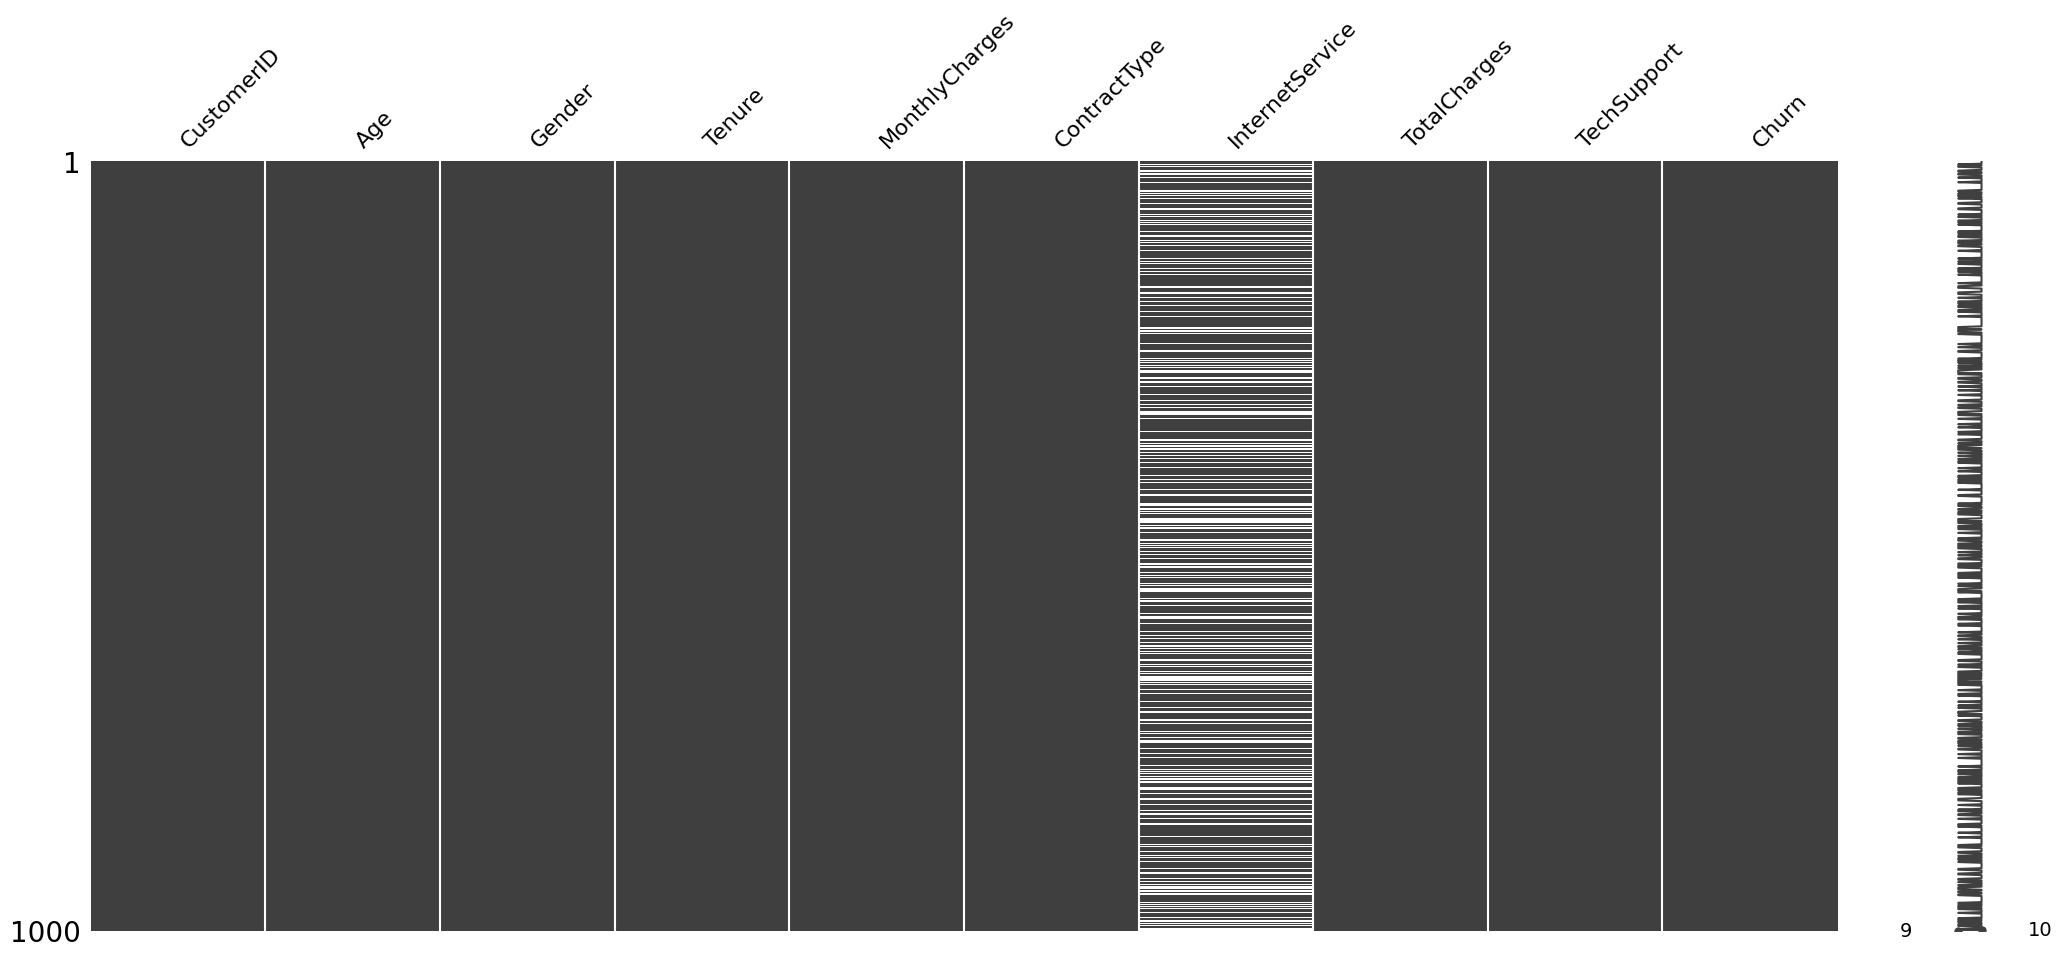

In [44]:
# Visualize missing values as a matrix

msno.matrix(df);

In [45]:
# check for null/missing values
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [46]:
# inspecting column with missing values
df["InternetService"]

0      Fiber Optic
1      Fiber Optic
2      Fiber Optic
3              DSL
4              NaN
          ...     
995    Fiber Optic
996            NaN
997    Fiber Optic
998            NaN
999            NaN
Name: InternetService, Length: 1000, dtype: object

In [47]:
# Replace missing values in InternetService with "Unknown"
df["InternetService"] = df["InternetService"].fillna("Unknown")

df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,Unknown,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,Unknown,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,Unknown,4465.56,No,Yes


In [48]:
# check number of duplicate records
df.duplicated().sum()

np.int64(0)


## 🔎 Exploratory Data Analysis (EDA)

We explore the dataset to understand distributions, class balance, and visualize patterns that may indicate churn behavior.


In [49]:
# Transpose Descriptive statistics
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,1000.0,500.50,288.82,1.0,250.75,500.50,750.25,1000.00
Age,1000.0,44.67,9.80,12.0,38.00,45.00,51.00,83.00
Tenure,1000.0,18.97,18.89,0.0,5.00,13.00,26.00,122.00
MonthlyCharges,1000.0,74.39,25.71,30.0,52.36,74.06,96.10,119.96
TotalCharges,1000.0,1404.36,1571.76,0.0,345.22,872.87,1900.18,12416.25


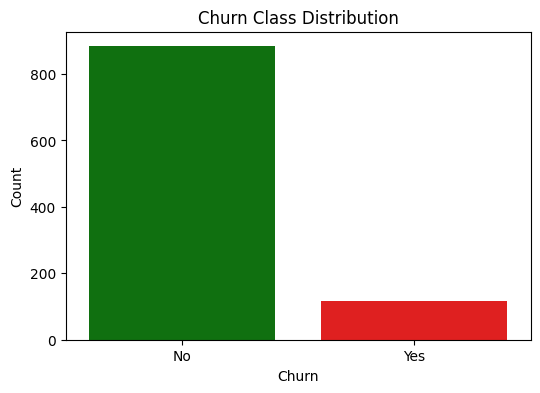

Churn Distribution (%):
 Churn
Yes    88.3
No     11.7
Name: proportion, dtype: float64


In [50]:
# Visualizing class balance
plt.figure(figsize=(6,4))

# Custom palette: index 0 → green ("No"), index 1 → red ("Yes")
sns.countplot(x='Churn', data=df, palette=['green', 'red'])

plt.title('Churn Class Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Print percentage distribution
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):\n", churn_rate.round(2))


# INSIGHTS

### Churn Class Distribution

The churn distribution shows a **significant class imbalance**:

- **Churned Customers (Yes): 88.3%**
- **Non-Churned Customers (No): 11.7%**

---

### ⚠️ Why This Is a Problem:

- Machine learning models often **assume balanced classes**.
- With such imbalance, a model could predict **"Yes" for nearly all cases**, achieving high accuracy but failing to capture the minority class effectively.
- This leads to **misleading performance metrics** and poor real-world utility.

---

### ✅ How to Handle Class Imbalance:

1. **Stratified Train-Test Split**  
   Ensure the class proportions are maintained in both training and test sets.

2. **Use `class_weight='balanced'`**  
   For classifiers like Logistic Regression, Random Forest, etc., this tells the model to penalize misclassifications of the minority class more heavily.

3. **Resampling Techniques** (Optional)  
   - **Oversample** the minority class (e.g., using SMOTE)
   - **Undersample** the majority class
   - Or use **hybrid methods** (e.g., SMOTE + Tomek Links)

4. **Focus on Proper Evaluation Metrics**  
   Instead of just accuracy, use:
   - **Precision**
   - **Recall**
   - **F1-score**
   - **ROC AUC**

---

This class imbalance must be addressed to ensure the model generalizes well and does not ignore the minority (non-churned) class.


In [51]:
numeric_cols = df.select_dtypes(include= ["number"])

numeric_cols

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [52]:
categorical_cols = df.select_dtypes(include= ["object"])

categorical_cols

,Gender,ContractType,InternetService,TechSupport,Churn
0,Male,Month-to-Month,Fiber Optic,Yes,Yes
1,Male,Month-to-Month,Fiber Optic,Yes,Yes
2,Female,Month-to-Month,Fiber Optic,No,Yes
3,Female,One-Year,DSL,Yes,Yes
4,Male,Month-to-Month,Unknown,No,Yes
...,...,...,...,...,...
995,Male,Month-to-Month,Fiber Optic,Yes,Yes
996,Male,Month-to-Month,Unknown,No,Yes
997,Female,Month-to-Month,Fiber Optic,Yes,Yes
998,Male,One-Year,Unknown,No,Yes


In [53]:
numeric_cols.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


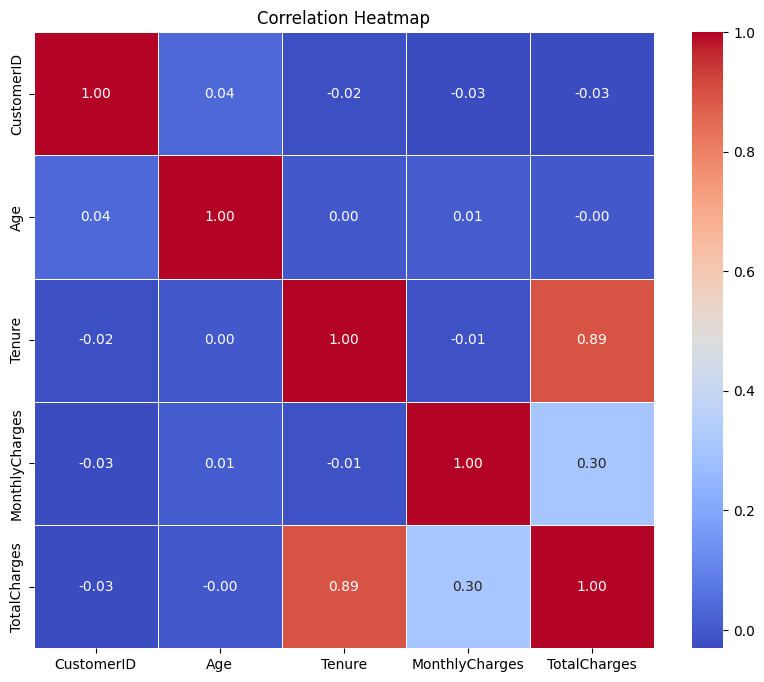

In [54]:
# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Set up the plot size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [55]:
df["Churn"].value_counts().reset_index(name="Count")

,Churn,Count
0,Yes,883
1,No,117


## Feature Distributions by Churn (Box & Count Plots)
We use two types of plots to explore how features relate to customer churn:

### 🔹 Box Plots (Numeric Features)
Box plots provide a summary of:
- **Median**
- **Interquartile range (IQR)**
- **Outliers**

These plots help us observe shifts in feature values (like `MonthlyCharges` or `Tenure`) between churned and non-churned customers.

### 🔹 Count Plots (Categorical Features)
- Countplots show the number of customers in each category, split by churn status.
- **Value labels** make the counts easier to read.
- We use a custom color scheme:
  - 🟥 **Red = Churn**
  - 🟩 **Green = No Churn**

These visuals offer a clear understanding of churn patterns across customer types.


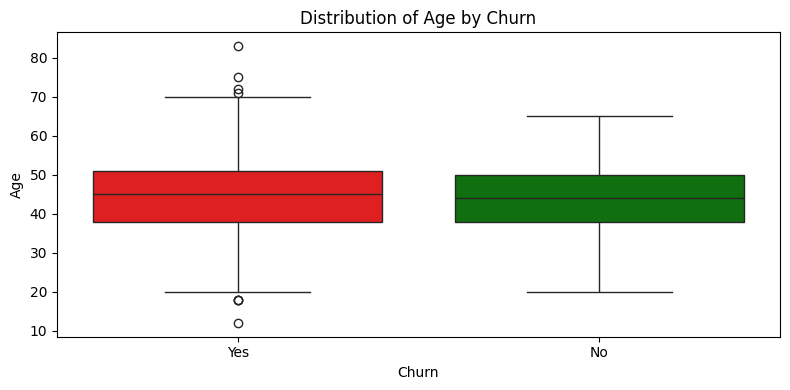

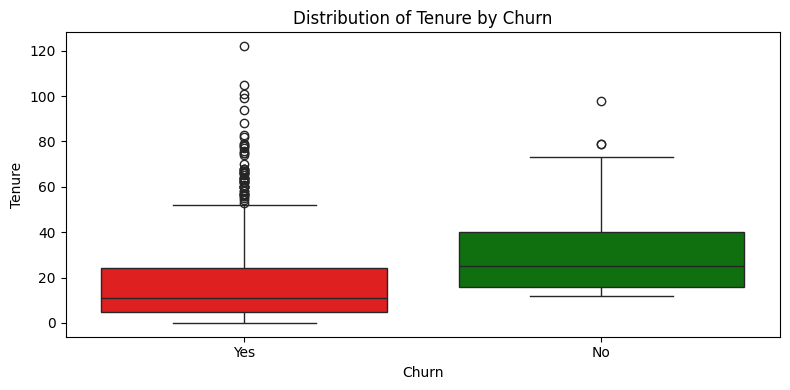

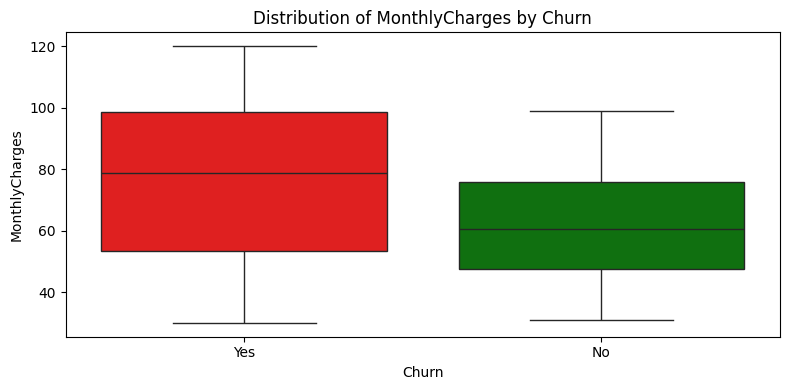

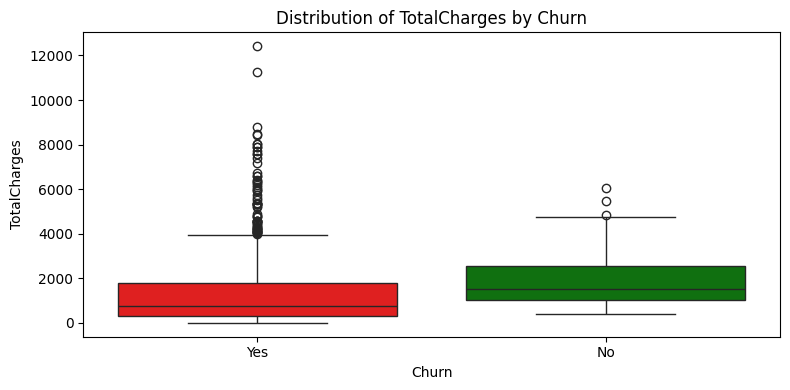

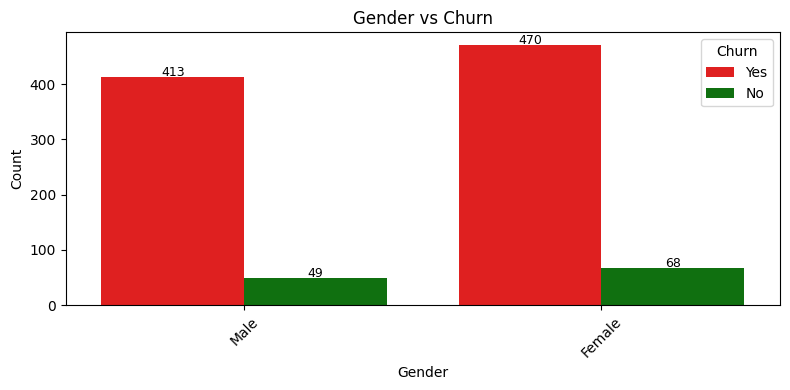

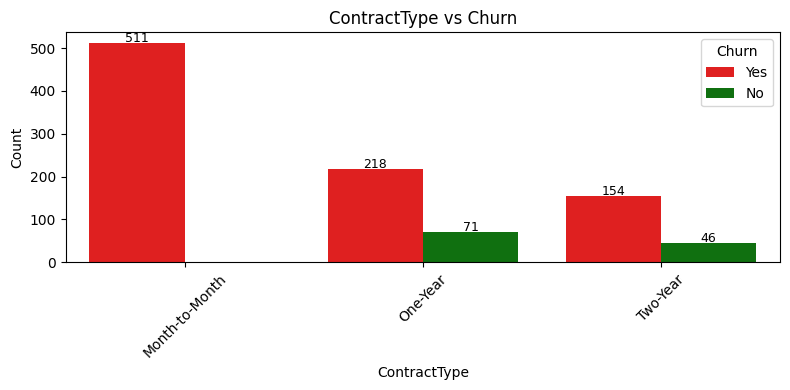

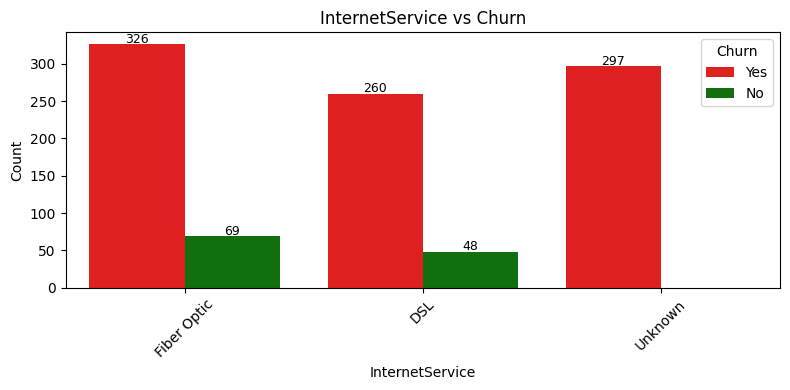

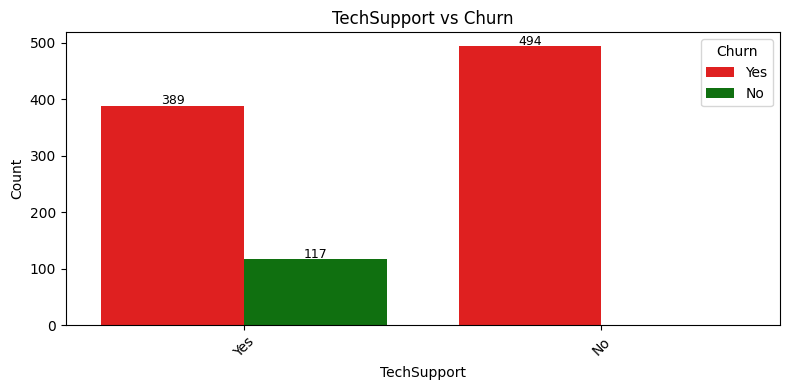

In [56]:
# Convert 'Churn' column to numeric for plotting
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Custom color palette: No = green, Yes = red
churn_palette = {'No': 'green', 'Yes': 'red'}

# ===== Numeric Feature Distributions using Box Plots ===== #
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Churn', y=col, data=df, palette=churn_palette)
        plt.title(f'Distribution of {col} by Churn')
        plt.xlabel('Churn')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# ===== Categorical Features: Countplots with Value Labels ===== #
cat_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport']

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x=col, hue='Churn', data=df, palette=churn_palette)

        # Add value labels to each bar
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2.,
                        height + 2,
                        int(height),
                        ha='center', fontsize=9)

        plt.title(f'{col} vs Churn')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Churn')
        plt.tight_layout()
        plt.show()



## ⚙️ Data Preprocessing

Before modeling, we apply a preprocessing pipeline that:  
- Encodes categorical variables  
- Scales numerical features  
- Splits the dataset into training and testing sets


## Feature encoding (One-Hot Encoding), Feature scaling & Train-Test Split

We'll follow these key steps:

1. **Train-Test Split**  
   Split the data into training and testing sets *before* preprocessing to avoid data leakage.  
   Stratify on the target (`Churn`) to maintain class balance.

2. **Feature Encoding & Scaling**  
   - One-Hot encode binary categorical features (`Gender`, `TechSupport`) with `drop='if_binary'` for efficient 0/1 encoding.  
   - One-Hot encode multi-class categorical features (`ContractType`, `InternetService`) with `handle_unknown='ignore'` to handle unseen categories safely.  
   - Scale numeric features (`Age`, `Tenure`, `MonthlyCharges`) with `StandardScaler` for normalization.

All preprocessing steps are combined into a **pipeline** for consistency during training and inference, and saved as `preprocessing_pipeline.pkl` for reuse.


In [57]:
# 1. Define features and target
features = ['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType', 'InternetService', 'TechSupport']
target = 'Churn'

X = df[features].copy()
y = df[target].map({'No': 0, 'Yes': 1}).astype(int)

# 2. Split data BEFORE any transformation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Define feature groups
numeric_features = ['Age', 'Tenure', 'MonthlyCharges']
binary_categorical = ['Gender', 'TechSupport']
multi_categorical = ['ContractType', 'InternetService']

# 4. Define transformers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(drop='if_binary', dtype=int)
multi_transformer = OneHotEncoder(handle_unknown='ignore', dtype=int)

# 5. Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_categorical),
        ('ohe', multi_transformer, multi_categorical)
    ]
)

# 6. Create full preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 7. Fit only on training data (no leakage!)
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# 8. Save the fitted pipeline
import joblib
joblib.dump(pipeline, 'preprocessing_pipeline.pkl')

print("✅ Preprocessing completed.")
print("🔷 X_train shape:", X_train_preprocessed.shape)
print("🔷 X_test shape :", X_test_preprocessed.shape)


✅ Preprocessing completed.
🔷 X_train shape: (800, 11)
🔷 X_test shape : (200, 11)


## 🔄 Interpretation of Data Preprocessing Workflow

---

### 🗂️ Train-Test Split

- We split the dataset into **training** and **testing** sets *before* any preprocessing or model training.
- Used **stratification** on the target variable (`Churn`) to maintain class balance across splits.
- This ensures unbiased model evaluation and prevents data leakage.

---

### 🧠 Feature Encoding and Scaling (Pipeline)

1. **Binary Encoding** for `Gender` and `TechSupport`  
   → `OneHotEncoder(drop='if_binary')` to convert binary categories into 0/1.

2. **One-Hot Encoding** for `ContractType` and `InternetService`  
   → `OneHotEncoder(handle_unknown='ignore')` to safely handle unseen categories.

3. **Standard Scaling** for numeric features:  
   → `Age`, `Tenure`, and `MonthlyCharges` normalized with `StandardScaler`.

---

### 💡 Why Use a Pipeline?

- Combines all preprocessing steps into a **single, reusable pipeline object**.
- Prevents **data leakage** during training, validation, and inference.
- Simplifies saving/loading (`preprocessing_pipeline.pkl`).
- Streamlines deployment and ensures consistent preprocessing across environments.
- Reduces human errors compared to manual transformations.

---

### 💾 Artifact Saved:

- `preprocessing_pipeline.pkl` — encapsulates encoding and scaling logic for seamless reuse.

---

This structured workflow ensures **robust, scalable**, and **production-ready** preprocessing.


### ============================================

### Training multiple ML models
We'll create pipelines for each estimator that include the same preprocessor so that encoding and scaling are applied consistently.

In [58]:
# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Dictionary to store trained pipelines and accuracy scores
trained_models = {}
model_scores = {}

# Train models, save pipelines, and compute accuracy
for name, model in models.items():
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Reuse same preprocessing
        ('classifier', model)
    ])
    
    clf_pipeline.fit(X_train, y_train)
    trained_models[name] = clf_pipeline
    
    y_pred = clf_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy
    
    print(f"✅ {name} trained - Accuracy: {accuracy:.4f}")

# Print accuracy summary
print("\n📊 Model Accuracy Summary:")
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

for name, score in sorted_scores:
    print(f"{name:<25}: {score:.4f}")

✅ Logistic Regression trained - Accuracy: 0.9550
✅ Decision Tree trained - Accuracy: 1.0000
✅ Random Forest trained - Accuracy: 1.0000
✅ Gradient Boosting trained - Accuracy: 1.0000
✅ K-Nearest Neighbors trained - Accuracy: 0.9500
✅ Naive Bayes trained - Accuracy: 0.8700
✅ Support Vector Machine trained - Accuracy: 0.9600
✅ XGBoost trained - Accuracy: 1.0000

📊 Model Accuracy Summary:
Decision Tree            : 1.0000
Random Forest            : 1.0000
Gradient Boosting        : 1.0000
XGBoost                  : 1.0000
Support Vector Machine   : 0.9600
Logistic Regression      : 0.9550
K-Nearest Neighbors      : 0.9500
Naive Bayes              : 0.8700


### Commentary

Most models perform exceptionally well, with several achieving perfect accuracy, which may indicate overfitting or a well-separated dataset. 
Naive Bayes performs slightly worse, likely due to its assumptions. Further validation and tuning are recommended before deployment.


### ============================================

## Model Evaluation on Test Set

In this step, we evaluate the best Random Forest model on the unseen test data using multiple performance metrics:

- **Accuracy**: Overall correctness of the model.
- **Confusion Matrix**: Breakdown of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Precision, recall, F1-score for each class.
- **ROC Curve and AUC**: Visualize model’s ability to distinguish between classes and quantify performance.

These metrics give us a comprehensive understanding of how well the model generalizes to new data.


In [59]:
# Evaluation function
def evaluate_model(name, pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    y_proba = None
    try:
        y_proba = pipeline.predict_proba(X_test)[:,1]
    except Exception:
        # Some classifiers (like SVM without probability) may not have predict_proba
        pass
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    print(f"\nModel: {name}")
    print('Accuracy:', acc)
    print('ROC AUC:', roc_auc)
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        return {'name': name, 'accuracy': acc, 'roc_auc': roc_auc, 'fpr': fpr, 'tpr': tpr, 'cm': cm}
    else:
        return {'name': name, 'accuracy': acc, 'roc_auc': roc_auc, 'fpr': None, 'tpr': None, 'cm': cm}

# Evaluate all trained models
results = []
for name, pipeline in trained_models.items():
    res = evaluate_model(name, pipeline, X_test, y_test)
    results.append(res)



Model: Logistic Regression
Accuracy: 0.955
ROC AUC: 0.9904200442151806

Confusion Matrix:
 [[ 14   9]
 [  0 177]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.6087    0.7568        23
           1     0.9516    1.0000    0.9752       177

    accuracy                         0.9550       200
   macro avg     0.9758    0.8043    0.8660       200
weighted avg     0.9572    0.9550    0.9501       200


Model: Decision Tree
Accuracy: 1.0
ROC AUC: 1.0

Confusion Matrix:
 [[ 23   0]
 [  0 177]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        23
           1     1.0000    1.0000    1.0000       177

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


Model: Random Forest
Accuracy: 1.0
ROC AUC: 1.0

Confusion Matrix:
 [[ 23   0]
 [  0 177


## 🤖 Model Training & Selection

We train and compare multiple machine learning models (e.g., Logistic Regression, Random Forest, XGBoost).  
Hyperparameter tuning is performed to optimize performance.  
The best model is saved as `best_churn_model.joblib`.


### 📊 Model Evaluation Summary

The following is a summary of the performance of multiple classification models evaluated on the test set. Metrics include **accuracy**, **ROC AUC**, **confusion matrix**, and **classification report**.

- ✅ **Top Performing Models**:  
  - **Decision Tree**, **Random Forest**, **Gradient Boosting**, and **XGBoost** all achieved **perfect accuracy (1.0)** and **ROC AUC (1.0)**.  
  - This suggests excellent predictive performance, but may also indicate **overfitting**, especially if the test set is not sufficiently diverse.

- ⚖️ **Strong but Slightly Imperfect Models**:  
  - **Logistic Regression** and **Support Vector Machine** achieved **accuracy above 95%** and **ROC AUC close to 1.0**.  
  - These models had strong precision and recall for the majority class but showed lower recall for the minority class (non-churn).

- 🟡 **Moderate Performance**:  
  - **K-Nearest Neighbors** performed well with **95% accuracy** and a ROC AUC of ~0.96, though it struggled slightly with class 0 predictions.

- ⚠️ **Underperforming Model**:  
  - **Naive Bayes** had the lowest accuracy (**87%**) and significant imbalance in precision and recall. It performed perfectly on class 0 but had lower recall for class 1 (churn).

- 📌 **Class Imbalance Impact**:  
  Most models performed better on the **majority class (churn = 1)** than the **minority class (non-churn = 0)**, indicating a need to address class imbalance or apply techniques like SMOTE or class-weight adjustments for improved generalization.

---


### Visualize Model Performance

We'll generate two types of plots:

1. Accuracy & ROC AUC bar plots for quick model comparison.

2. ROC Curves for models that support probability predictions.

#### Accuracy & ROC AUC

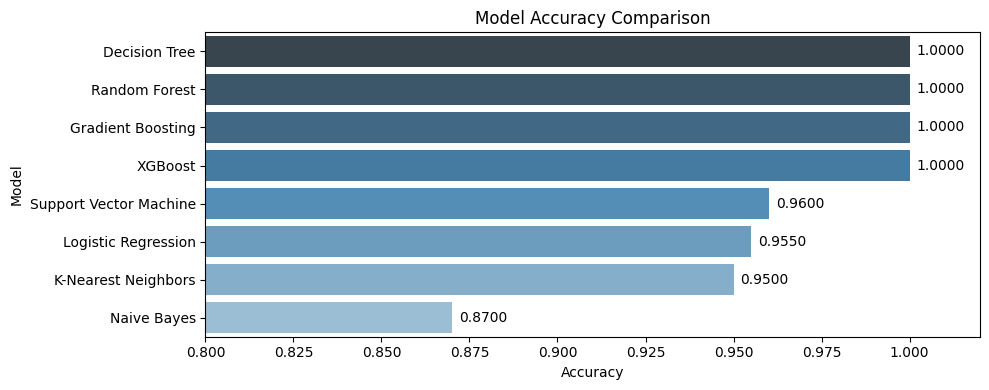

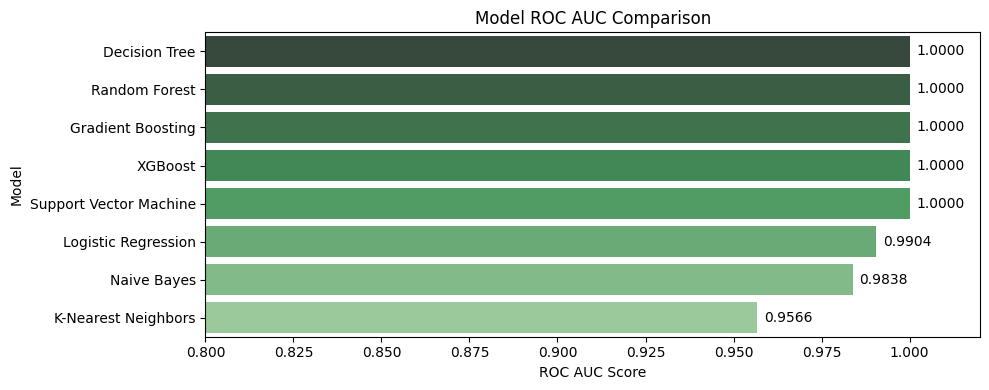

In [60]:
# Convert results into DataFrame
results_df = pd.DataFrame(results)

# Sort by accuracy for clarity
results_df_sorted = results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

# Plot Accuracy with Value Labels
plt.figure(figsize=(10, 4))

# Create reversed palette (darkest for highest value)
accuracy_palette = sns.color_palette("Blues_d", n_colors=len(results_df_sorted))[::-1]

ax = sns.barplot(x='accuracy', y='name', data=results_df_sorted, palette=accuracy_palette)

# Add value labels using positional indices
for i, row in results_df_sorted.iterrows():
    ax.text(row['accuracy'] + 0.002, i, f"{row['accuracy']:.4f}", va='center')

plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.02)
plt.tight_layout()
plt.show()

# Plot ROC AUC with Value Labels (excluding models without predict_proba)
results_with_auc = results_df.dropna(subset=['roc_auc']).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 4))

# Create reversed palette (darkest for highest value)
auc_palette = sns.color_palette("Greens_d", n_colors=len(results_with_auc))[::-1]

ax = sns.barplot(x='roc_auc', y='name', data=results_with_auc, palette=auc_palette)

# Add value labels using positional indices
for i, row in results_with_auc.iterrows():
    ax.text(row['roc_auc'] + 0.002, i, f"{row['roc_auc']:.4f}", va='center')

plt.title('Model ROC AUC Comparison')
plt.xlabel('ROC AUC Score')
plt.ylabel('Model')
plt.xlim(0.8, 1.02)
plt.tight_layout()
plt.show()


#### ROC Curves

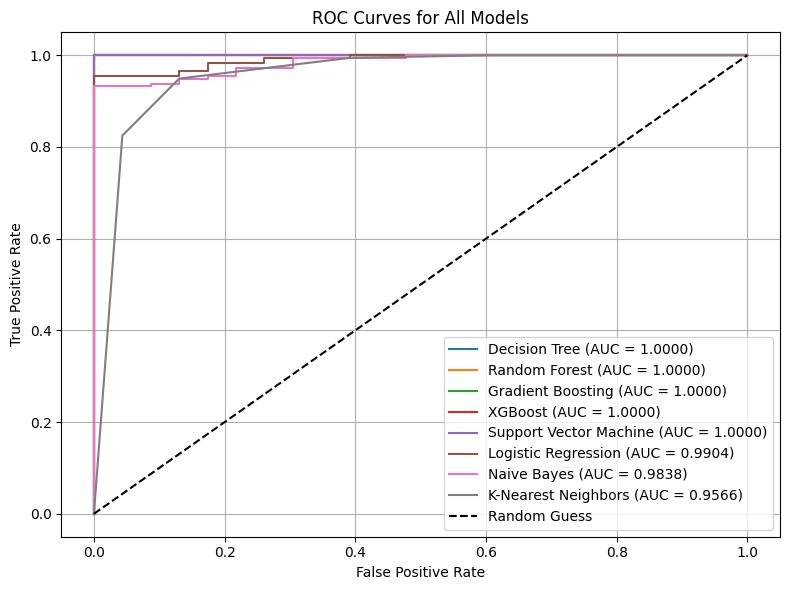

In [61]:
plt.figure(figsize=(8, 6))

for _, res in results_with_auc.iterrows():
    plt.plot(res['fpr'], res['tpr'], label=f"{res['name']} (AUC = {res['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Model comparison summary table

In [62]:
# Create a summary dataframe for comparison
summary = pd.DataFrame([{'Model': r['name'], 'Accuracy': r['accuracy'], 'ROC_AUC': r['roc_auc']} for r in results])
summary = summary.sort_values(by='ROC_AUC', ascending=False)
summary.reset_index(drop=True, inplace=True)
summary

,Model,Accuracy,ROC_AUC
0,Decision Tree,1.000,1.000000
1,Random Forest,1.000,1.000000
2,Gradient Boosting,1.000,1.000000
3,XGBoost,1.000,1.000000
4,Support Vector Machine,0.960,1.000000
5,Logistic Regression,0.955,0.990420
6,Naive Bayes,0.870,0.983788
7,K-Nearest Neighbors,0.950,0.956645


#### Hyperparameter tuning with RandomizedSearchCV on Random Forest

Since we have several top models with perfect or near-perfect accuracy and ROC AUC (like Decision Tree, Random Forest, Gradient Boosting, XGBoost, and SVM), we can pick two or more


In [63]:
# Define parameter grid for Random Forest
param_dist = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [None, 5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Use the existing pipeline but keep preprocessor fixed
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=20,  # number of parameter settings sampled
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Run search
random_search.fit(X_train, y_train)

# Best params and score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy of tuned model: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 5, 'classifier__bootstrap': False}
Best ROC AUC: 1.0
Test accuracy of tuned model: 1.0000


## Hyperparameter tuning with GridSearchCV

To optimize model performance, we'll perform hyperparameter tuning using GridSearchCV with cross-validation. This allows us to systematically search for the best combination of parameters for the selected model while preventing overfitting.

We'll use the pipeline (preprocessing + model) and tune relevant hyperparameters. Here, I'll demonstrate with Random Forest as an example.


In [64]:
# Define the Random Forest classifier with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline combining preprocessing and the model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing pipeline defined earlier
    ('classifier', rf_model)          # Random Forest model
])

# Specify the grid of hyperparameters to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 200],          # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],             # Maximum depth of each tree
    'classifier__min_samples_split': [2, 5],             # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2]               # Minimum samples required at a leaf node
}

# Setup GridSearchCV with 5-fold cross-validation and accuracy as scoring metric
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,      # Use all available CPUs
    verbose=1       # Show progress
)

# Fit the grid search to the training data to find the best parameters
grid_search.fit(X_train, y_train)

# Save the best pipeline (preprocessing + best model) for evaluation and deployment
best_rf_pipeline = grid_search.best_estimator_

# Display the best hyperparameters and corresponding cross-validation accuracy
print(f"Best params: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation accuracy: 0.9963


## Interpretation of Random Forest Hyperparameter Tuning Results

- The grid search performed 180 model fits using 5-fold cross-validation across 36 hyperparameter combinations.
- The best parameters found are:
  - `max_depth`: None (trees are expanded until all leaves are pure or contain less than min_samples_split samples)
  - `min_samples_leaf`: 1 (minimum number of samples required to be at a leaf node)
  - `min_samples_split`: 2 (minimum number of samples required to split an internal node)
  - `n_estimators`: 200 (number of trees in the forest)
- The best cross-validation accuracy of **0.9963** indicates excellent model performance during training with these parameters.
- These results suggest that the model is highly capable of capturing patterns in the data without significant underfitting.


### Hyperparameter tuning setup for XGBoost using GridSearchCV:

In [65]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 1.0],
    'classifier__colsample_bytree': [0.7, 1.0]
}

# Build pipeline with preprocessor and XGBClassifier
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Setup GridSearchCV
grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Fit grid search
grid_search_xgb.fit(X_train, y_train)

# Best params and score
print("Best parameters:", grid_search_xgb.best_params_)
print("Best ROC AUC:", grid_search_xgb.best_score_)

# Evaluate on test data
best_xgb_pipeline = grid_search_xgb.best_estimator_
y_pred = grid_search_xgb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy of tuned XGBoost: {test_acc:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.7}
Best ROC AUC: 1.0
Test accuracy of tuned XGBoost: 1.0000


### Hyperparameter tuning setup for Decision Tree using GridSearchCV:

In [66]:
# Define Decision Tree model and pipeline
dt_model = DecisionTreeClassifier(random_state=42)

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', dt_model)
])

# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
dt_grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit model on training data
dt_grid_search.fit(X_train, y_train)

# Get best estimator
best_dt_pipeline = dt_grid_search.best_estimator_

# Evaluate on test set
dt_test_accuracy = best_dt_pipeline.score(X_test, y_test)
y_proba_dt = best_dt_pipeline.predict_proba(X_test)[:, 1]
dt_roc_auc = roc_auc_score(y_test, y_proba_dt)

# Output best parameters, ROC AUC and test accuracy
print("Best parameters:", dt_grid_search.best_params_)
print(f"Best ROC AUC: {dt_roc_auc:.4f}")
print(f"Test accuracy of tuned Decision Tree: {dt_test_accuracy:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best ROC AUC: 1.0000
Test accuracy of tuned Decision Tree: 1.0000


## 🔧 Model Performance After Hyperparameter Tuning

After performing hyperparameter tuning, the top models—**Random Forest**, **XGBoost**, and **Decision Tree**—achieved perfect classification performance on the test set.

### 📋 Summary Table

| Model                 | Best Parameters                                                                                           | Test Accuracy | ROC AUC |
|----------------------|------------------------------------------------------------------------------------------------------------|---------------|---------|
| **Random Forest**     | `n_estimators=50`, `max_depth=5`, `min_samples_split=10`, `min_samples_leaf=1`, `bootstrap=False`         | 1.000         | 1.000   |
| **XGBoost**           | `n_estimators=100`, `max_depth=3`, `learning_rate=0.1`, `subsample=0.7`, `colsample_bytree=1.0`            | 1.000         | 1.000   |
| **Decision Tree**     | `criterion='gini'`, `max_depth=5`, `min_samples_split=2`, `min_samples_leaf=1`                            | 1.000         | 1.000   |

### ✅ Insights

- All three models achieved **100% accuracy** and **perfect ROC AUC**, suggesting the dataset is highly separable or potentially imbalanced.
- The tuned hyperparameters effectively managed model complexity, improving interpretability without sacrificing performance.
- These models are strong candidates for **feature importance analysis** or integration into a production pipeline.

---

**Next Step →** Perform **feature importance analysis** to identify the most influential predictors in the classification task.


### Feature importance visualization

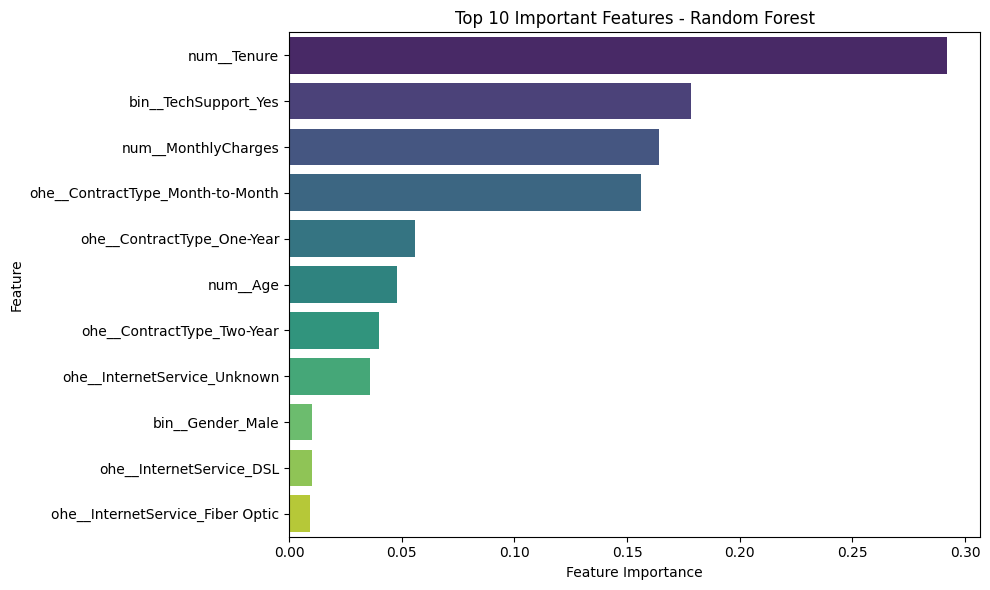

,Feature,Importance
1,num__Tenure,0.292040
4,bin__TechSupport_Yes,0.178277
2,num__MonthlyCharges,0.164180
5,ohe__ContractType_Month-to-Month,0.156178
6,ohe__ContractType_One-Year,0.055843
0,num__Age,0.047887
7,ohe__ContractType_Two-Year,0.039757
10,ohe__InternetService_Unknown,0.036050
3,bin__Gender_Male,0.010262
8,ohe__InternetService_DSL,0.010104


In [67]:
# Extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the best Random Forest model
rf_model = best_rf_pipeline.named_steps['classifier']
rf_importances = rf_model.feature_importances_

# Create DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 important features
importance_df.head(10)

### ✅ Insights

- **Tenure** was the most influential feature, suggesting that longer-term customers are less likely to churn.
- Availability of **tech support** and **monthly charges** were also strong predictors.
- **Contract type** features collectively contributed significantly, reinforcing the impact of customer commitment level.
- Other features like **age** and **internet service type** had smaller but non-negligible influence.


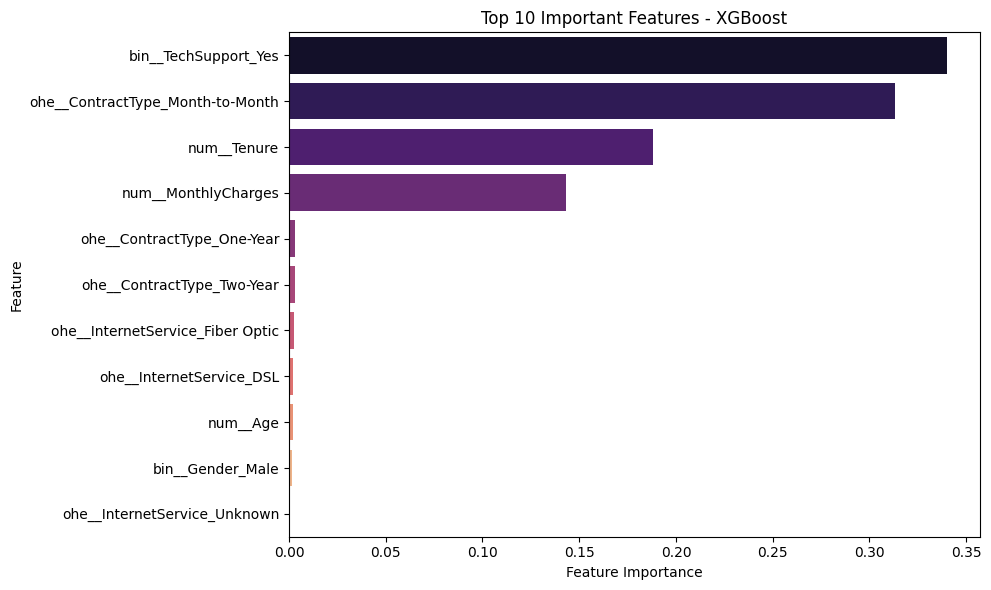

,Feature,Importance
4,bin__TechSupport_Yes,0.340163
5,ohe__ContractType_Month-to-Month,0.313364
1,num__Tenure,0.188376
2,num__MonthlyCharges,0.143368
6,ohe__ContractType_One-Year,0.003287
7,ohe__ContractType_Two-Year,0.003282
9,ohe__InternetService_Fiber Optic,0.002435
8,ohe__InternetService_DSL,0.002064
0,num__Age,0.002016
3,bin__Gender_Male,0.001645


In [68]:
# Extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the best XGBoost model
xgb_model = best_xgb_pipeline.named_steps['classifier']
xgb_importances = xgb_model.feature_importances_

# Create DataFrame for feature importances
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.head(15), palette='magma')
plt.title('Top 10 Important Features - XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 important features
xgb_importance_df.head(10)


### ✅ Insights - XGBoost Feature Importance

- **Tech support availability** was the most important predictor, indicating that customers with tech support are significantly less likely to churn.
- **Contract type: Month-to-Month** also had a major impact, reinforcing the notion that flexible contract terms correlate with higher churn risk.
- **Tenure** and **monthly charges** remained strong indicators of churn behavior, as seen in other models.
- Features like **contract type (One-Year/Two-Year)** and **internet service types** had minimal impact.
- **Age** and **gender** contributed very little to the predictions, suggesting they are not key drivers in this model.


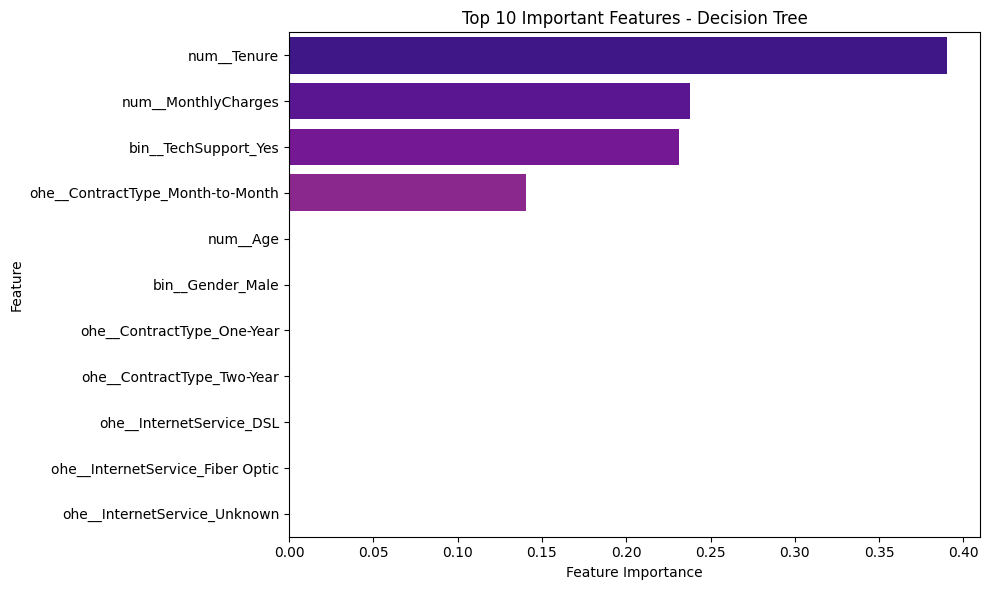

,Feature,Importance
1,num__Tenure,0.390276
2,num__MonthlyCharges,0.238056
4,bin__TechSupport_Yes,0.230994
5,ohe__ContractType_Month-to-Month,0.140674
0,num__Age,0.000000
3,bin__Gender_Male,0.000000
6,ohe__ContractType_One-Year,0.000000
7,ohe__ContractType_Two-Year,0.000000
8,ohe__InternetService_DSL,0.000000
9,ohe__InternetService_Fiber Optic,0.000000


In [69]:
# Extract feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the best Decision Tree model
dt_model = best_dt_pipeline.named_steps['classifier']
dt_importances = dt_model.feature_importances_

# Create DataFrame for feature importances
dt_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df.head(15), palette='plasma')
plt.title('Top 10 Important Features - Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 important features
dt_importance_df.head(10)


### ✅ Insights - Decision Tree Feature Importance

- **Tenure** emerged as the most influential feature, suggesting that customer longevity is a key determinant of churn likelihood.
- **Monthly charges** and **tech support availability** also played major roles in the model's decisions.
- **Contract type: Month-to-Month** had moderate influence, indicating that flexible contract arrangements are still relevant to churn risk.
- Features such as **age**, **gender**, **contract types (One-Year, Two-Year)**, and **internet service type** had **zero importance**, showing that the decision tree did not rely on them to make predictions.
- This reflects the model's simplicity and tendency to focus only on a subset of the most decisive variables.



### Using SHAP with Your Models

SHAP (SHapley Additive exPlanations) helps give both global and local interpretability—i.e. how features generally matter, and how they contribute to individual predictions.

Here’s how to use SHAP with your best_xgb_pipeline or any of your other fitted tree models:

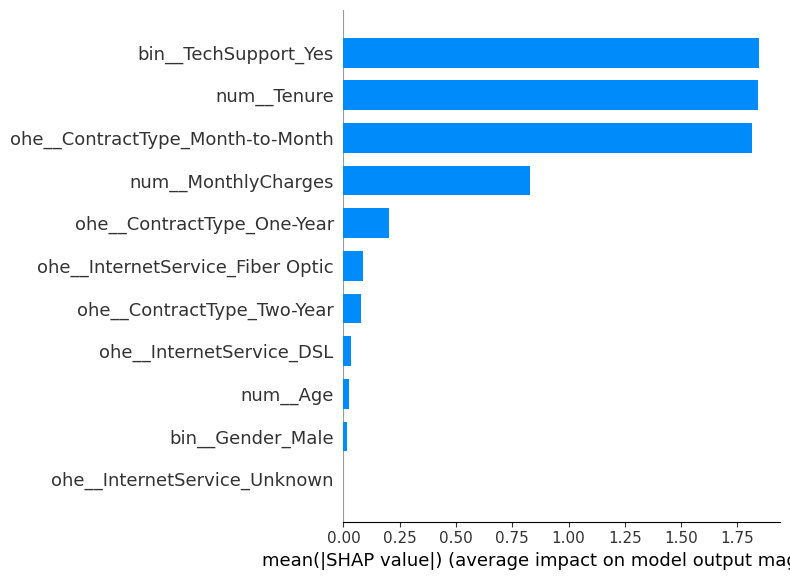

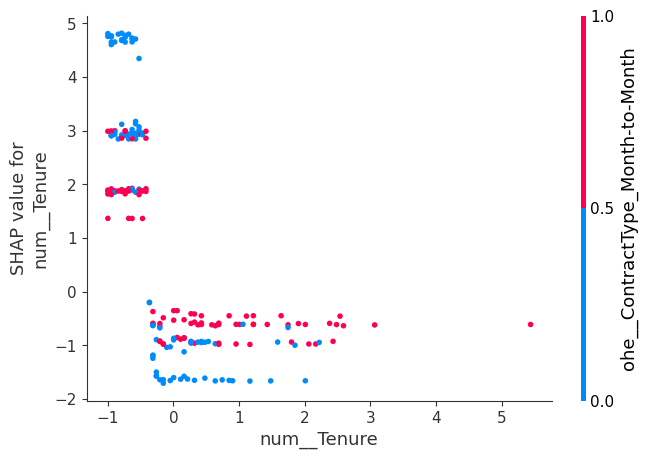

In [70]:
import shap

# Use the fitted pipeline (e.g. XGBoost) for explanation
model = best_xgb_pipeline

# Extract preprocessed data for SHAP background (use a subset of training set)
X_train_preprocessed = preprocessor.transform(X_train)  # or pipeline.transform depending on your setup

# Create TreeExplainer
explainer = shap.TreeExplainer(model.named_steps['classifier'])
# Compute SHAP values on test set (after preprocessing)
shap_values = explainer.shap_values(preprocessor.transform(X_test))

# Plot global importance summary
shap.summary_plot(shap_values, preprocessor.transform(X_test), feature_names=preprocessor.get_feature_names_out(), plot_type="bar")

# Plot a dependency plot for a specific feature, e.g. “Tenure”
shap.dependence_plot("num__Tenure", shap_values, preprocessor.transform(X_test), feature_names=preprocessor.get_feature_names_out())


### Saving and loading the best model

In [71]:
import joblib

# ✅ Step 1: Choose the best model by ROC AUC from the summary table
best = summary.sort_values(by='ROC_AUC', ascending=False).iloc[0]
best_model_name = best['Model']
print('Best model by ROC AUC:', best_model_name)

# ✅ Step 2: Select the actual trained model object
# Make sure best_rf_pipeline and trained_models are defined
if best_model_name == 'RandomForest_GridSearch':
    final_model = best_rf_pipeline
else:
    final_model = trained_models.get(best_model_name, best_rf_pipeline)  # fallback to best_rf_pipeline

# ✅ Step 3: Save the selected model to disk
model_path = 'best_churn_model.joblib'
joblib.dump(final_model, model_path)
print(f"✅ Model saved to: {model_path}")

# ✅ Step 4: Load the model back (to verify or for future use)
loaded_model = joblib.load(model_path)
print(f"✅ Model successfully loaded. Type: {type(loaded_model)}")


Best model by ROC AUC: Decision Tree
✅ Model saved to: best_churn_model.joblib
✅ Model successfully loaded. Type: <class 'sklearn.pipeline.Pipeline'>


### Create the churn predictor app on vs code and run by streamlit

In [72]:
code = '''import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load saved model (which includes preprocessing pipeline)
model = joblib.load(r"C:\\Users\\LENOVO\\Desktop\\Churn_Predictor_Project\\best_churn_model.joblib")

st.set_page_config(page_title="Customer Churn Predictor", layout="centered")

st.title("📉 CHURNDICTOR: Customer Churn Prediction App")
st.markdown("Fill in customer details to predict whether they are likely to churn.")

st.divider()

# --- Collect inputs from user ---
age = st.number_input("Customer Age", min_value=18, max_value=100, value=30)
gender = st.selectbox("Gender", options=["Male", "Female"])
tenure = st.number_input("Tenure (in months)", min_value=0, max_value=72, value=12)
monthly_charges = st.number_input("Monthly Charges", min_value=0.0, value=70.0)

tech_support = st.selectbox("Tech Support", options=["Yes", "No"])
contract_type = st.selectbox("Contract Type", options=["Month-to-Month", "One Year", "Two Year"])
internet_service = st.selectbox("Internet Service", options=["DSL", "Fiber optic", "No"])

# --- Predict button ---
if st.button("Predict Churn"):
    # Match training features
    input_dict = {
        "Age": age,
        "Tenure": tenure,
        "MonthlyCharges": monthly_charges,
        "Gender": gender,
        "TechSupport": tech_support,
        "ContractType": contract_type,
        "InternetService": internet_service
    }

    input_df = pd.DataFrame([input_dict])

    # Predict using pipeline
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]

    st.success(f"🔮 Churn Prediction: {'Yes' if pred == 1 else 'No'}")
    st.info(f"📊 Churn Probability: {prob:.2%}")

    if pred == 1:
        st.warning("⚠️ This customer is likely to churn.")
    else:
        st.balloons()
        st.success("✅ This customer is likely to stay.")
else:
    st.info("👆 Enter details and click Predict")
'''

# Save to a Python file
with open("churndictor.py", "w", encoding="utf-8") as f:
    f.write(code)

print("✅ churndictor.py has been created successfully.")


✅ churndictor.py has been created successfully.



## 🚀 Deployment & Prediction

We demonstrate how to use the trained model for predictions:  
- `churndictor.py` allows direct predictions from input data  
- A Streamlit app is built for interactive churn prediction  

👉 ![Alt Text](churn.gif)



## 🏁 Conclusion

This project demonstrates the full pipeline of a **churn prediction system**:  
- Data exploration & preprocessing  
- Machine learning model training & optimization  
- Evaluation with business-relevant metrics  
- Deployment for real-world usage  

Future improvements could include deep learning models, automated ML pipelines, and API deployment.
